<a href="https://colab.research.google.com/github/Guruvarshini/VARSHA/blob/main/winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Guruvarshini/winequality/main/WineQT%20(1).csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
#Input variables (based on physicochemical tests):\
#fixed acidity\volatile acidity\ citric acid\ residual sugar/chlorides\free sulfur dioxide\total sulfur dioxide\density\pH\sulphates\alcohol\
#Output variable (based on sensory data):\ quality (score between 0 and 10)//
x=df.iloc[:,0:11].values
y=df.iloc[:,11].values
print(x)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.2    0.6    0.08  ...  3.45   0.58  10.5  ]
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]]
[5 5 5 ... 5 6 5]


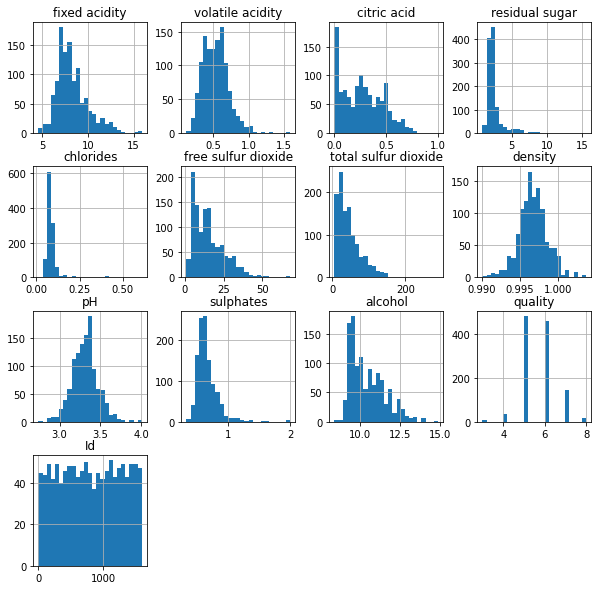

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Text(0, 0.5, 'alcohol')

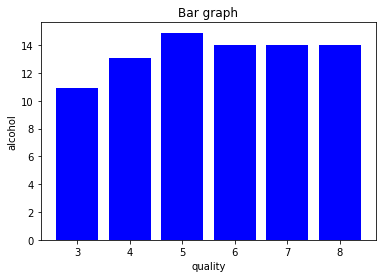

In [ ]:
plt.title("Bar graph")
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='blue')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

Text(0, 0.5, 'fixed acidity')

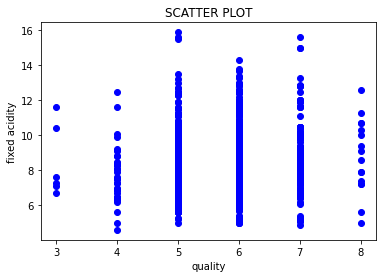

In [ ]:
plt.scatter(df['quality'],df['fixed acidity'],color = 'blue')
plt.title('SCATTER PLOT')
plt.xlabel('quality')
plt.ylabel('fixed acidity')

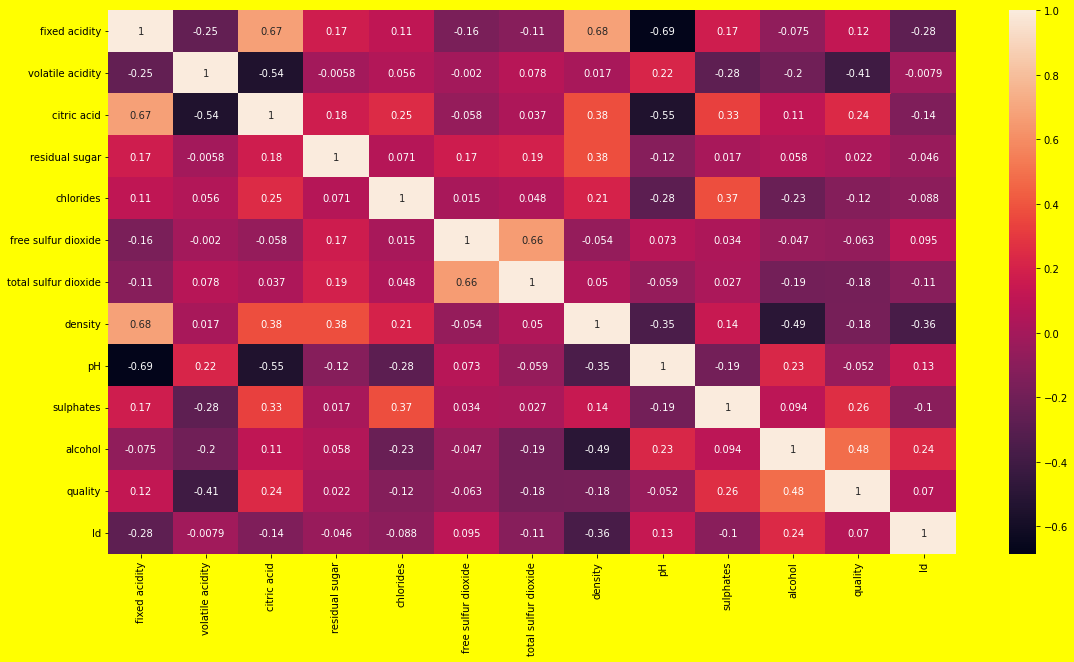

In [ ]:
# import seaborn
import seaborn as sb
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='yellow')
sb.heatmap(df.corr(),annot=True)

In [ ]:
#5.TRAIN and TEST VARIABLES - train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)
#When train test split happens - training variables get 75% of data
#testing variables get the remaining 25%

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1143, 11)
(857, 11)
(286, 11)
(1143,)
(857,)
(286,)


Normalization
We do normalization on numerical data because our data is unbalanced it means the difference between the variable values is high so we convert them into 1 and 0.


In [ ]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.20353982 0.26446281 0.         ... 0.4        0.15432099 0.46153846]
 [0.43362832 0.3553719  0.83544304 ... 0.26956522 0.20987654 0.18461538]
 [0.16814159 0.33884298 0.07594937 ... 0.45217391 0.30864198 0.29230769]
 ...
 [0.46017699 0.2231405  0.5443038  ... 0.28695652 0.08024691 0.46153846]
 [0.22123894 0.33057851 0.03797468 ... 0.55652174 0.16666667 0.21538462]
 [0.37168142 0.17355372 0.51898734 ... 0.3826087  0.17901235 0.56923077]]


In [ ]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#creating RandomForestClassifier constructor
model = RandomForestClassifier()
#8.FIT the model
model.fit(x_train,y_train)




RandomForestClassifier()

In [ ]:
#Predict the output
y_pred = model.predict(x_test) #using the input testing values , we predict the output
y_pred #PREDICTED OUTPUT VALUES

array([5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 7, 6, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       7, 5, 6, 7, 5, 5, 6, 7, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 7, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 7, 6,
       5, 5, 5, 6, 5, 7, 5, 5, 6, 5, 6, 7, 6, 5, 7, 6, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 7, 6, 6, 6, 7, 5, 5, 5, 5, 6, 7, 5, 6, 5, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 6, 7, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 7, 5, 6, 6, 6, 7, 5, 5, 6, 7, 6,
       6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 5, 6, 7, 5])

In [ ]:
y_test #ACTUAL OUTPUT VALUES

array([5, 4, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       7, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 4, 5, 6, 5, 6, 6, 6,
       5, 5, 5, 7, 8, 6, 6, 5, 5, 7, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 7, 5, 5, 6, 7, 6, 7, 6, 7, 5, 7, 5, 5, 6, 5, 6, 6, 6, 5,
       5, 7, 6, 7, 4, 5, 6, 6, 5, 5, 5, 5, 3, 5, 8, 5, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 7, 6,
       6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 5, 6, 7, 6, 5, 5, 6, 6, 6,
       5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 7, 7, 6, 5, 4, 5, 7, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 4, 4, 5, 7, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 4, 7, 7, 7, 5, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 6, 5, 7,
       6, 6, 6, 5, 5, 6, 7, 5, 5, 5, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 7, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 5, 7, 6, 6, 5, 6, 5, 7, 5])

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

66.08391608391608

In [ ]:
#INDIVIDUAL PREDICTION
model.predict([[7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]])
#output=5.0

array([5])

In [ ]:
model.predict([[7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0]])
#output=7

array([7])